### backpropagation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(X, W1, b1, W2, b2):
    Z = 1/(1+np.exp(-X.dot(W1)-b1)) # value of hidden nodes
    A = Z.dot(W2)+b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True) # otput nodes
    return Y, Z

In [3]:
def classification_rate(Y,P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i]==P[i]:
            n_correct +=1
    return float(n_correct)/n_total

In [4]:
def create_data():  
    X1 = np.random.randn(n_class, D) + np.array([0, -2]) # 500 dots centered around coordinates {0,-2} (x=0, y=-2)
    X2 = np.random.randn(n_class, D) + np.array([2, 2])
    X3 = np.random.randn(n_class, D) + np.array([-2, 2])
    X = np.vstack([X1,X2,X3])
    Y = np.array([0]*n_class + [1]*n_class + [2]*n_class) # generate labels (X1=0, X2=1, X3=2)  
    return X, Y

In [5]:
def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

In [6]:
def derivative_w2(hidden, target, output):
    N, K = target.shape # number of samples by number of target classes
    M = hidden.shape[1] # number of hidden units
    # slow version
    # ret1 = np.zeros((M,K))
    # for n in range(N):
        # for m in range(M):
            # for k in range(K):
                # ret1[m,k] += (target[n,k]-output[n,k])*hidden[n,m] # gradient ascent
    ret1 = hidden.T.dot(target - output)
    return ret1    

In [7]:
def derivative_b2(target, output):
    return (target-output).sum(axis=0)

In [8]:
def derivative_w1(X, hidden, target, output, W2):
    N, D = X.shape # number of samples by number of features
    M, K = W2.shape # number of hidden units by number of target classes
        
    # ret1 = np.zeros((D,M))
    # for n in range(N):
        # for k in range(K):
            # for m in range(M):
                # for d in range(D):
                    # ret1[d,m] += (target[n,k]-output[n,k])*W2[m,k]*hidden[n,m]*(1-hidden[n,m])*X[n,d]
                    
    # fastest
    dHidden = (target - output).dot(W2.T) * hidden * (1 - hidden)
    ret1 = X.T.dot(dHidden)                
    return ret1

In [9]:
def derivative_b1(hidden, target, output, W2):
    # fast way with code vectorisation
    return ((target-output).dot(W2.T) * hidden * (1-hidden)).sum(axis=0)

In [10]:
# define input and target matrix sizes
n_class = 500 # 500 samples per class
D = 2 # dimentionality of inputs => number of features
M = 3 # number of hidden units
K = 3 # number of target classes

In [11]:
X, Y = create_data()

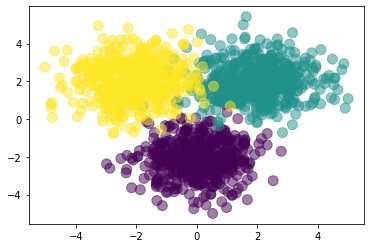

In [12]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [13]:
# turn targets into 1-hot encoded matrix (now Y has value from {1,2,3})
N = len(Y)
T = np.zeros((N,K)) # number of samples by number of target classes (500x3)
# set to 1 cells in T that correspond to value of Y for each sample
for i in range(N):
    T[i, Y[i]] = 1

In [14]:
# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [15]:
def backpropagation(X, W1, b1, W2, b2, Y, T):
    learning_rate = 10e-7
    costs = []
    
    for epoch in range(100000):
        output, hidden = forward(X, W1, b1, W2, b2)
        
        # for every 100 epochs calculate the cost and classification rate
        if epoch % 10000 == 0:
            c = cost(T, output)
            P = np.argmax(output, axis=1) # calculate prediction
            r = classification_rate(Y, P)
            print("cost: ", c, "classification rate: ", r)
            costs.append(c)
        
        # do gradient ascent
        W2 += learning_rate * derivative_w2(hidden, T, output)
        b2 += learning_rate * derivative_b2(T, output)
        W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
        b1 += learning_rate * derivative_b1(hidden, T, output, W2)
    
    return costs

In [16]:
result = backpropagation(X, W1, b1, W2, b2, Y, T)

cost:  -1440.3490628892016 classification rate:  0.658
cost:  -612.325337072899 classification rate:  0.962
cost:  -369.15674210388244 classification rate:  0.9686666666666667
cost:  -278.7142546895901 classification rate:  0.97
cost:  -233.91705757056502 classification rate:  0.9693333333333334
cost:  -207.8884907397122 classification rate:  0.9686666666666667
cost:  -191.1595502030969 classification rate:  0.9686666666666667
cost:  -179.62519830466323 classification rate:  0.9673333333333334
cost:  -171.24456052148142 classification rate:  0.9673333333333334
cost:  -164.8993483355191 classification rate:  0.9686666666666667


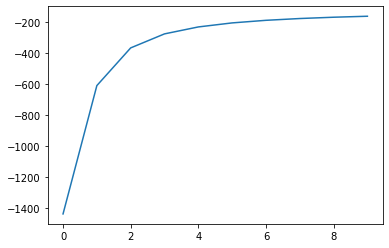

In [17]:
plt.plot(result)
plt.show()